In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from models import Model

/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../../transformed_data/cleaned_egg_sales.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.rename(columns={"egg_sales": "y"}, inplace=True)
print("Length of the df: ", len(df))

Length of the df:  10950


1095


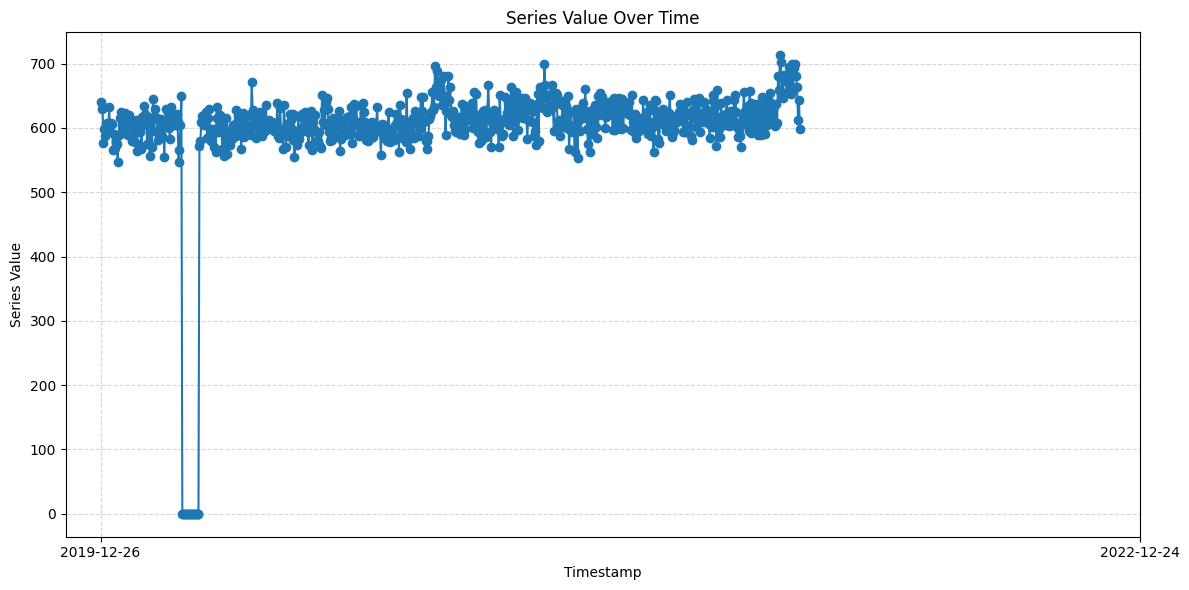

In [4]:
df_short = df[-int(len(df) * 0.1):]
print(len(df_short))

start = df_short['ts'].min()
end = df_short['ts'].max()


plt.figure(figsize=(12, 6))
plt.plot(df_short['ts'], df_short['y'], marker='o')

# Start and End-Ticks
plt.xticks([start, end], [start.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')])

plt.xlabel('Timestamp')
plt.ylabel('Series Value')
plt.title('Series Value Over Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
split_idx   = int(len(df) * 0.8)

df_train = df.iloc[:len(df)-358-28].copy().reset_index(drop=True)
df_test  = df.iloc[-358-28:].copy().reset_index(drop=True)

In [6]:
print("Duplicates:", df.duplicated().sum())
print("NaNs:\n", df.isna().sum())
print("Frequency check:", df.diff().dropna().value_counts().head())

Duplicates: 0
NaNs:
 ts      0
y     358
dtype: int64
Frequency check: ts      y    
1 days   0.0     162
         4.0     162
        -6.0     160
         10.0    159
         8.0     153
Name: count, dtype: int64


In [7]:
model = Model(df=df, df_train=df_train, df_test=df_test)

⚠️  NaN values detected: 358
⚠️  Non-30-min gaps found:
ts
1 days    10949
Name: count, dtype: int64


# Baseline

In [8]:
baseline = model.base_line()

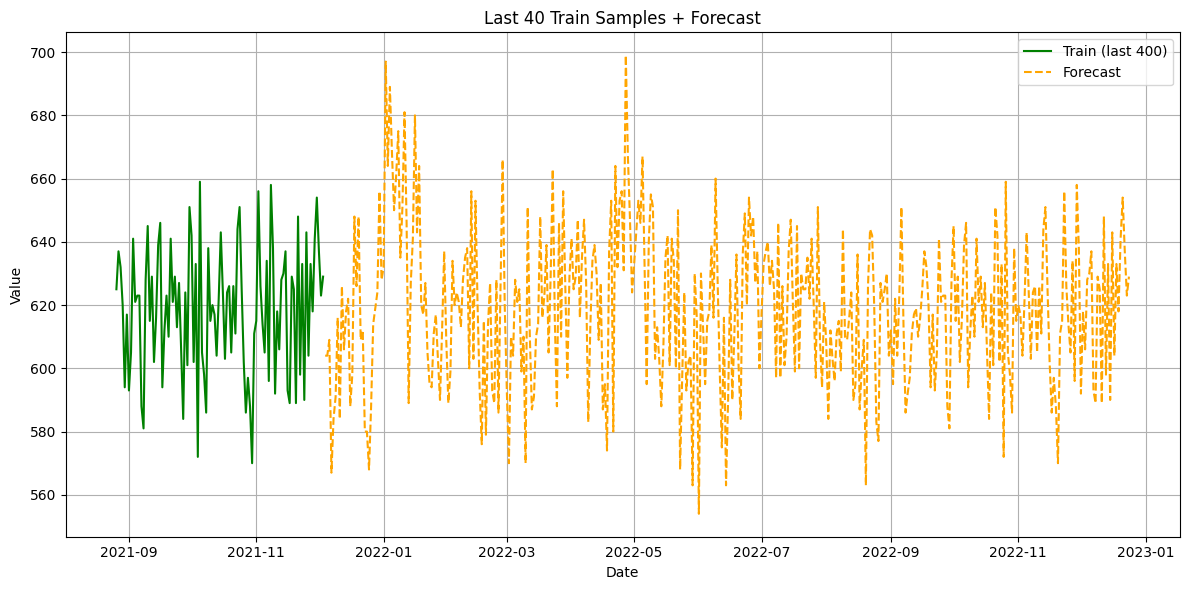

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_train['ts'].iloc[-100:], df_train['y'].iloc[-100:], label='Train (last 400)', color='green')
plt.plot(baseline['ts'], baseline["yhat"], label='Forecast', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Last 40 Train Samples + Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# LSTM

In [10]:
lstm_model = model.LSTM()

Epoch 1/50


/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df)
/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df)
/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.p

264/264 - 2s - 9ms/step - loss: 0.0030 - mae: 0.0425 - val_loss: 0.0187 - val_mae: 0.0964
Epoch 2/50
264/264 - 1s - 5ms/step - loss: 0.0144 - mae: 0.0742 - val_loss: 0.0201 - val_mae: 0.1055
Epoch 3/50
264/264 - 1s - 5ms/step - loss: 0.0137 - mae: 0.0637 - val_loss: 0.0194 - val_mae: 0.1034
Epoch 4/50
264/264 - 1s - 5ms/step - loss: 0.0126 - mae: 0.0638 - val_loss: 0.0182 - val_mae: 0.1007
Epoch 5/50
264/264 - 1s - 5ms/step - loss: 0.0123 - mae: 0.0667 - val_loss: 0.0167 - val_mae: 0.0969
Epoch 6/50
264/264 - 1s - 5ms/step - loss: 0.0114 - mae: 0.0681 - val_loss: 0.0154 - val_mae: 0.0949
Epoch 7/50
264/264 - 1s - 5ms/step - loss: 0.0120 - mae: 0.0640 - val_loss: 0.0121 - val_mae: 0.0834
Epoch 8/50
264/264 - 1s - 5ms/step - loss: 0.0066 - mae: 0.0504 - val_loss: 0.0101 - val_mae: 0.0746
Epoch 9/50
264/264 - 1s - 5ms/step - loss: 0.0035 - mae: 0.0409 - val_loss: 0.0083 - val_mae: 0.0658
Epoch 10/50
264/264 - 1s - 5ms/step - loss: 0.0022 - mae: 0.0354 - val_loss: 0.0076 - val_mae: 0.0609


In [ ]:
lstm_model

# TimeFM

In [13]:
timefm = model.times_fm("D")

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 74631.74it/s]
INFO:root:Loading checkpoint from /Users/kseniablokhina/.cache/huggingface/hub/models--google--timesfm-2.0-500m-pytorch/snapshots/dc2443792ce5516872b89b37cf1bc058c3bf0c10/torch_model.ckpt
INFO:root:Sending checkpoint to device cpu
INFO:root:Preprocessing dataframe.


Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].
Finished preprocessing dataframe.


INFO:root:Finished creating output dataframe.


Finished forecasting.


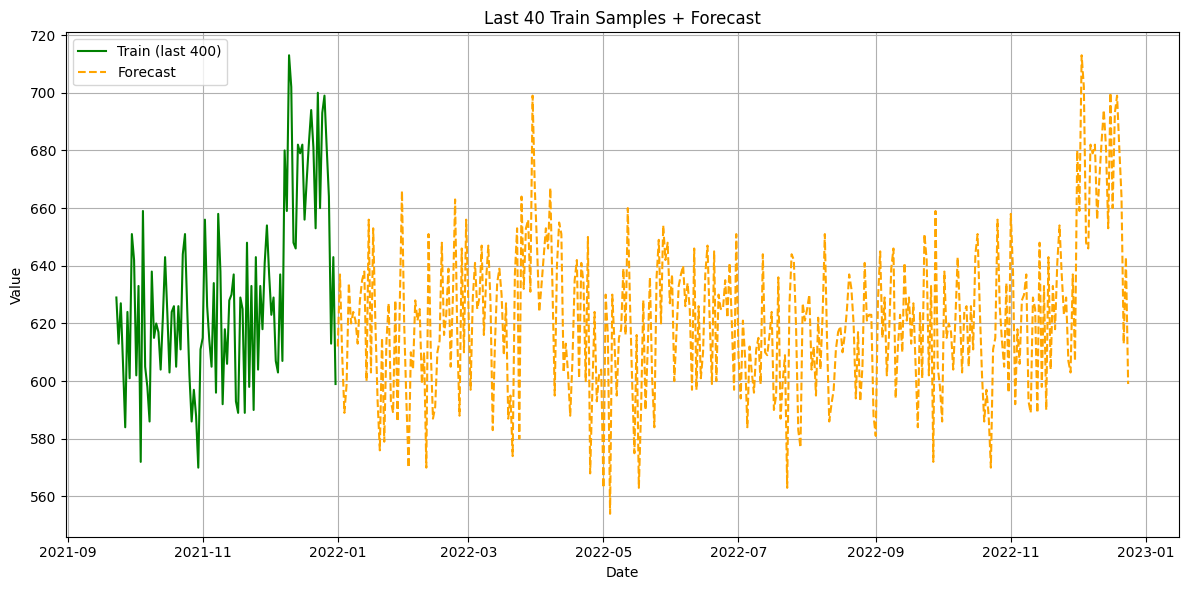

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_train['ts'].iloc[-100:], df_train['y'].iloc[-100:], label='Train (last 400)', color='green')
plt.plot(baseline['ts'], baseline["yhat"], label='Forecast', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Last 40 Train Samples + Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()